<a href="https://colab.research.google.com/github/tmatenzeno91/Matthew-Oladimeji-ML-projects/blob/main/Foodhub_Analysis_Matt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FoodHub Data Analysis

### Context
Foodhub is an online food delivery company with an app where customers can place food order from different restaurants registered on their online portal. The app assigns a delivery person from the company for pickup on confirmation, the delivery person uses the map to navigate to the restaurant for pickup and drop off to the customer. The pickup and drop-off time is recorded on the app by the delivery person and the customer then rates the order accordingly. Foodhub earns money by collecting a fixed margin on the delivery order from the restaurant.

### Goal
To analyse the Foodhub order data for insights on food order per restaurant for optimized service delivery and customers' experience.

### Data Dictionary
* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information.



In [21]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd. read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [23]:
# Copying data before manipulations to avoind changing the structure of the original dataframe
df_1 = df.copy()

### Profiling the data and checking missing values

In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [25]:
df_1.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [26]:
# summarizing the categorical variables
df_1.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


In [27]:
# Checking for the unique values in the data
df_1.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

* order_id is the unique ID of the customers
* customer_id is not equal the total number of observations meaning some customer ordered multiple times
* Aside the identifyers (order and customer ID), there are 3 continuous variables and 4 categroical variables.
* There are 1898 observations in the data
* There are no missing data in the data as all the variables have 1898 observations.

In [28]:
# Dropping the ID columns
#df_1=df_1.drop(['order_id'],axis=1)

In [29]:
# Creating numerical columns
num_cols=['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Creating categorical variables
cat_cols= ['restaurant_name', 'cuisine_type','day_of_the_week', 'rating',]

#### Describing the numerical variables

In [30]:
df_1[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


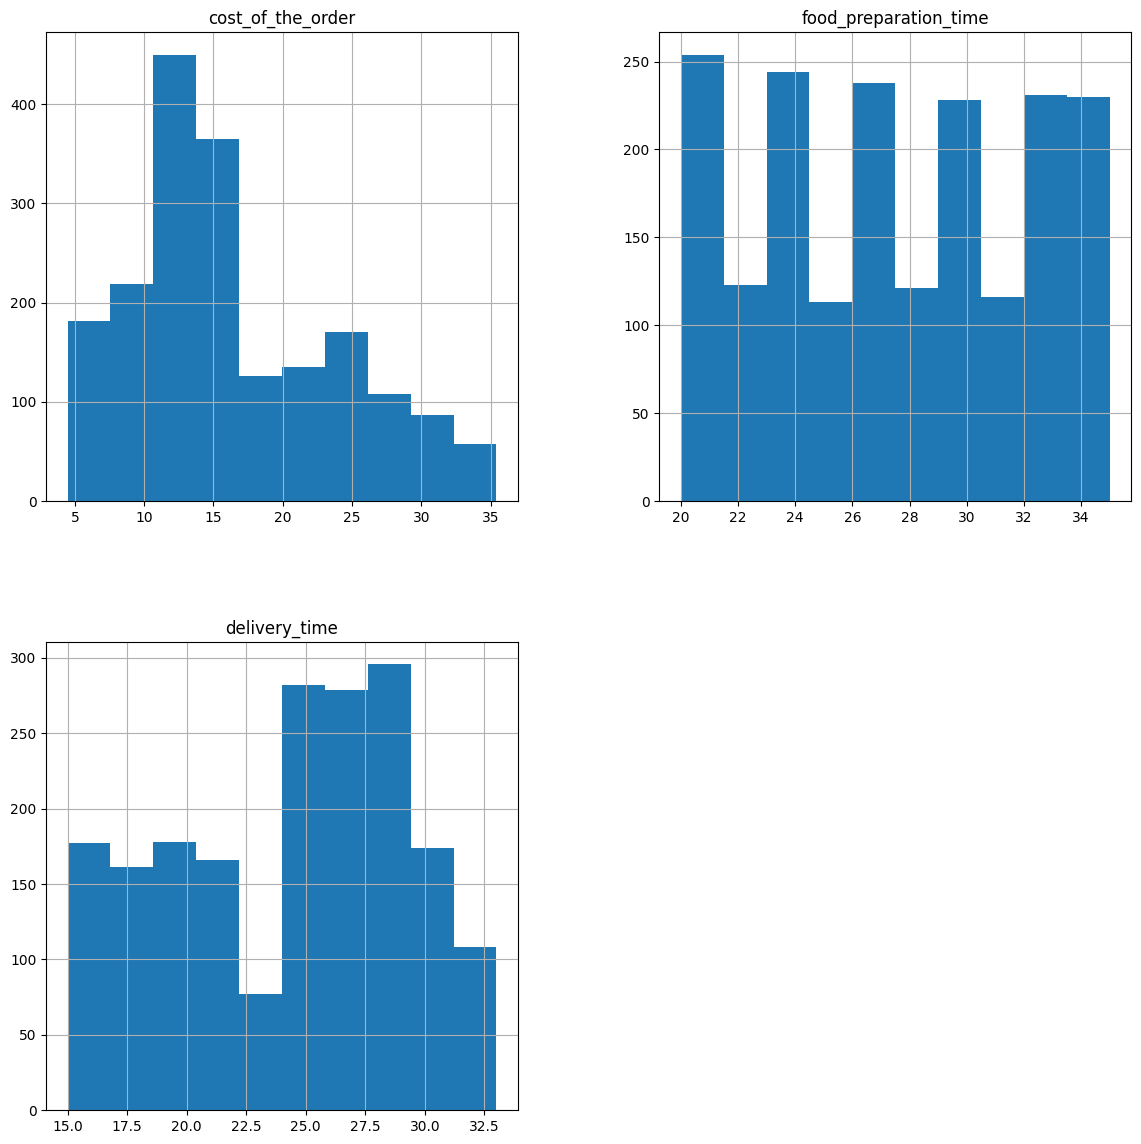

In [31]:
# Creating histograms for numerical variables
df[num_cols].hist(figsize=(14,14))
plt.show()

#### Observations

* Most of the orders cost around 16 dollar . Although there were cheaper orders as low as $4.
* The mean cost of order is higher than the median meaning few expensive cuisines were ordered skewing the distribution to the right.
* On average the food preparation time is 27mins. The maximum time for food preparation was 35 minutes.
*On average, the order delivery time took 24 minutes. Although orders were delivered in a very short time making the distribution slightly skewed.

#### Describing the categroical variables

In [59]:

# Developing a function to describe the proportion of each categorical variables
import seaborn as sns
import matplotlib.pyplot as plt

def bar_perc(data, z, x_label='', y_label='', plot_title=''):
    total = len(data[z]) # Length of the column
    plt.figure(figsize=(17, 4))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                   # Width of the plot
        y = p.get_y() + p.get_height()                             # Height of the plot
        ax.annotate(percentage, (x, y), size=12)                   # Annotate the percentage

    # Add X and Y labels and Plot title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)

    plt.show()

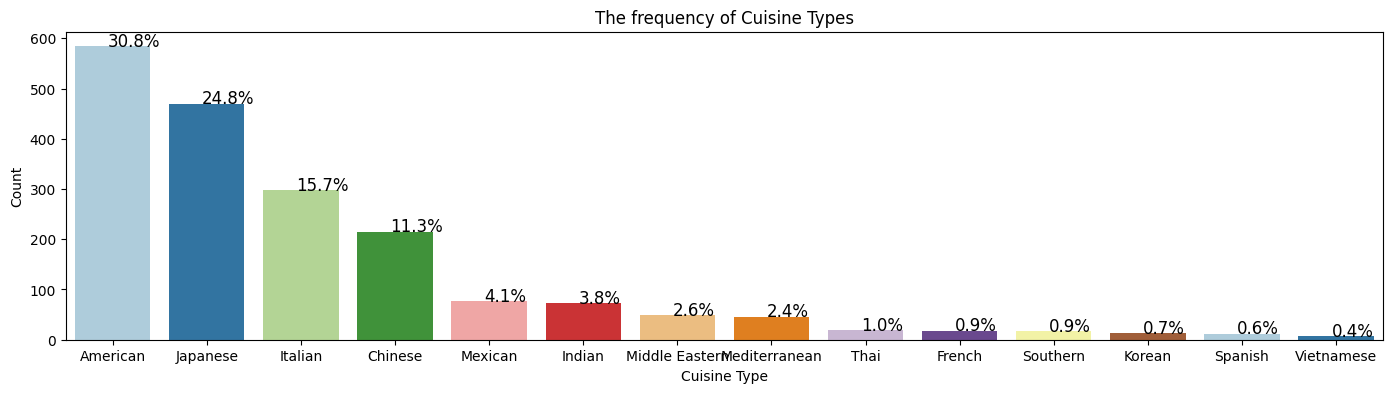

In [60]:
bar_perc(df_1, 'cuisine_type',
x_label='Cuisine Type', y_label='Count', plot_title='The frequency of Cuisine Types' )

##### Observation
* The American cuisine has the highest demand followed by japanese, chinese, Mexican and India cuisins

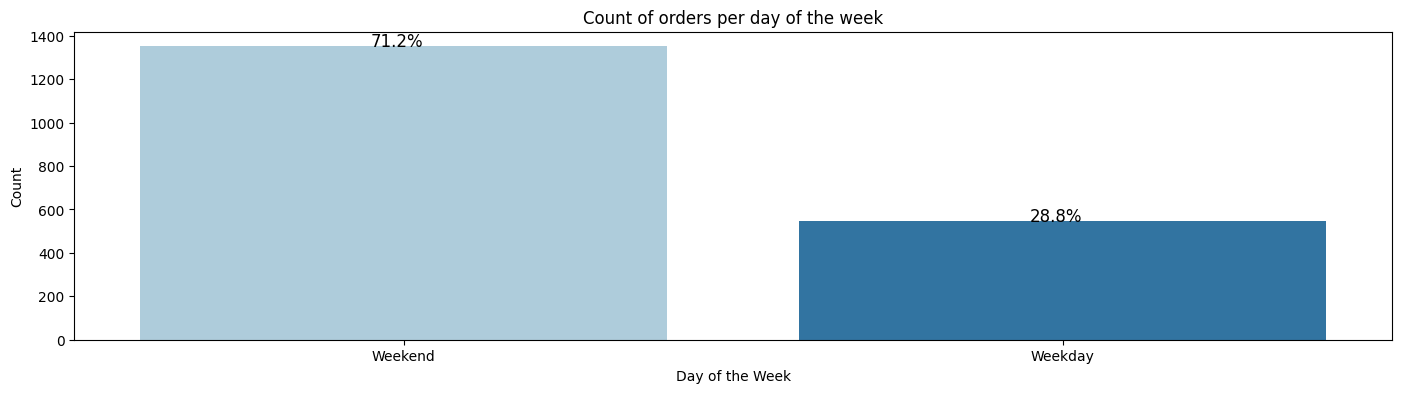

In [66]:
bar_perc(df, 'day_of_the_week',
        x_label='Day of the Week', y_label='Count', plot_title='Count of orders per day of the week' )

##### Observation
* More food is ordered on weekends as compared to weekdays.

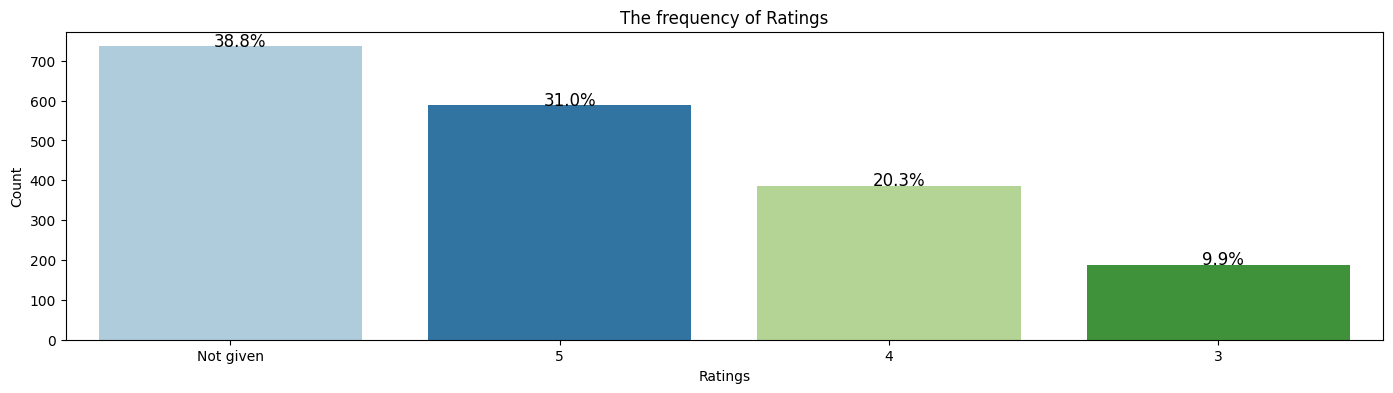

In [67]:
bar_perc(df, 'rating',
         x_label='Ratings', y_label='Count', plot_title='The frequency of Ratings')

##### Observation
* The highest proportion (38.8%) of the food ordered was not rated and the second highest proportion (31%) were rated 5.

### Bivariate analysis

* To  further draw insight, I explored the relationship between 2 variables.


#### Looking at the top 5 restaurants with the highest number food order

In [36]:
pd.pivot_table(df_1, index='restaurant_name', values='order_id', aggfunc='count').sort_values(by=['order_id'], ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


In [37]:
df_1[df_1.day_of_the_week=='Weekend'
    ].pivot_table(index=['day_of_the_week','cuisine_type'],
                  values='order_id', aggfunc='count'
                 ).sort_values(by=['order_id'], ascending=False)#.head(5)

order_id
day_of_the_week cuisine_type            
Weekend         American             415
                Japanese             335
                Italian              207
                Chinese              163
                Mexican               53
                Indian                49
                Mediterranean         32
                Middle Eastern        32
                Thai                  15
                French                13
                Korean                11
                Southern              11
                Spanish               11
                Vietnamese             4

##### Observation
* The top 5 restaurants were Shake Shack, The Meatball Shop, Blue Ribbon Sushi,
 Blue Ribbon, Fried Chicken, Parm.
* Most ordered cuisines on a weekend were American followed by Japanese, Italian and Chinese Cuisines respectively.

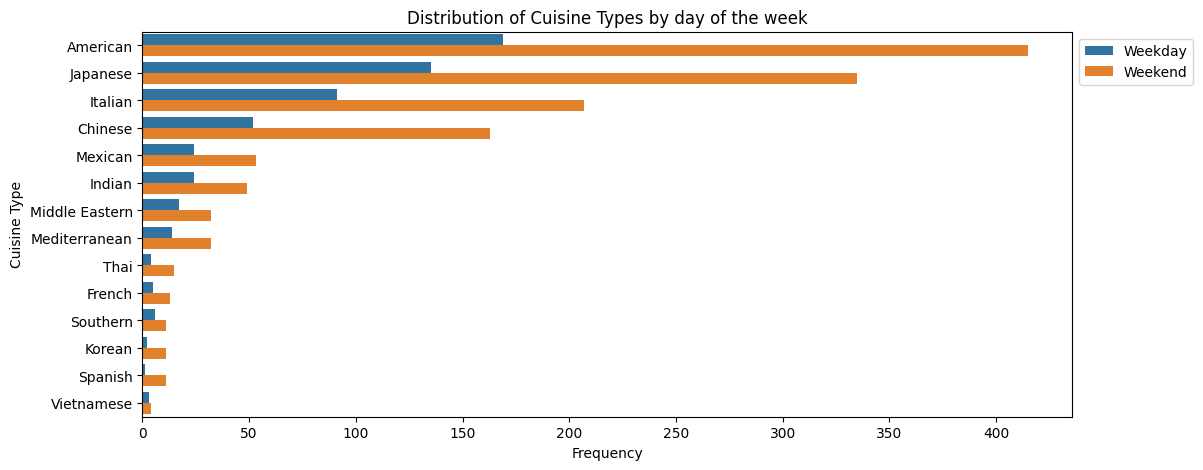

<function matplotlib.pyplot.show(close=None, block=None)>

In [76]:
#To look at the distribution of Cuisines by weekdays and weekend
plt.figure(figsize = (12, 5))
sns.countplot(data=df, y='cuisine_type', hue='day_of_the_week', order =df['cuisine_type'].value_counts().index)
plt.ylabel('Cuisine Type')
plt.xlabel('Frequency')
plt.title ('Distribution of Cuisine Types by day of the week')
#to position the legend
plt.legend(bbox_to_anchor = (1, 1))
plt.show()
#To display the plot

plt.show

* All through all the Cuisine types, there was a higher demand on weekends as compared to weekdays
* Korean Cuisine and Spanish cuisines are almost only demanded on weekends
* American Cuisine seems to have disproportionately higher demands on weekends.
* American cuisine has the highest demand followed by Japanese, Italian, and Chinese. Mexican and Indian seem to have this frequency and distribution across weekends and weekdays.
* Vietnamese is the least demanded cuisine.

#### Exploring the association between the total delivery time (food preparation time + Food delivery time) and the ratings from consumers

<ipython-input-74-e99b7100c876>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x = "rating", y = "Total_delivery_time", ci = 0, data = df_1, hue = 'cuisine_type')


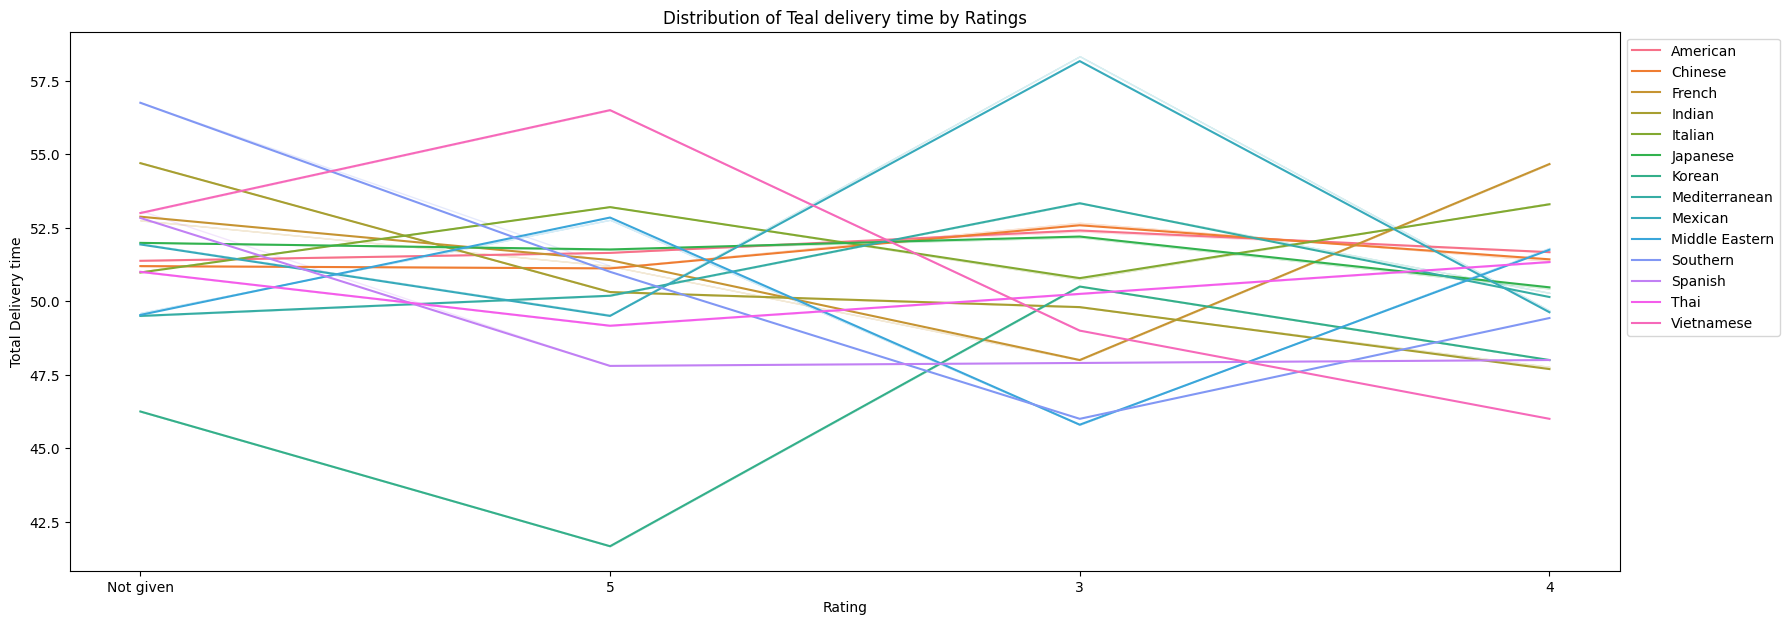

In [74]:
df_1['Total_delivery_time']= df_1['food_preparation_time']+ df_1['delivery_time']
plt.figure(figsize = (20, 7))
sns.lineplot(x = "rating", y = "Total_delivery_time", ci = 0, data = df_1, hue = 'cuisine_type')
plt.ylabel('Total Delivery time')
plt.xlabel('Rating')
plt.title ('Distribution of Teal delivery time by Ratings')
#to position the legend
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

<ipython-input-73-00542cddd206>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(x = df_1.rating, y = np.log1p(df_1.Total_delivery_time), estimator ='sum', ci = 0, hue = df_1.cuisine_type)


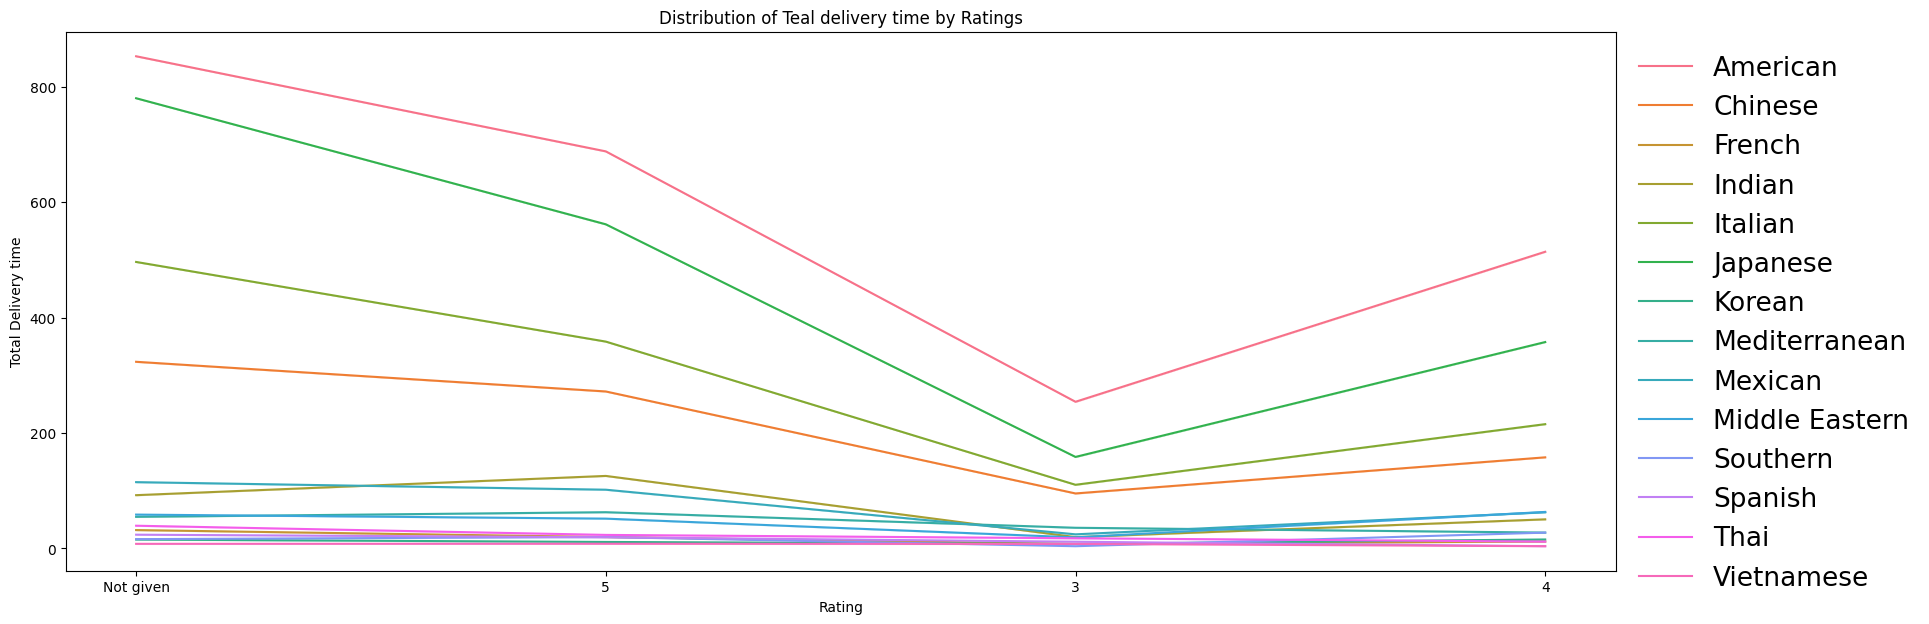

In [73]:
#To make it distinct, we log transform Total delivery time on the Y axis
plt.figure(figsize = (20, 7))
sns.lineplot(x = df_1.rating, y = np.log1p(df_1.Total_delivery_time), estimator ='sum', ci = 0, hue = df_1.cuisine_type)
plt.ylabel('Total Delivery time')
plt.xlabel('Rating')
plt.title ('Distribution of Teal delivery time by Ratings')
plt.legend(bbox_to_anchor = (1, 1), frameon=False, fontsize=19)
plt.show()

##### Observation
* Four of the Cuisines (American, Japanese, Italian and Chinese) were not rated at all when the Total delivery times were high.
*Also the four above-mentioned Cuisines seem to be mostly impacted by the Total delivery times. Other Cuisines seem to not show significant changes.
The rating was decreasing with increasing time until rating 3 when it picked up again.
* This means the rating is likely influenced by other factors. There is a need for further analysis.

Text(0.5, 1.0, 'Strip plot for the Distribution of Cuisine Types by cost of Order')

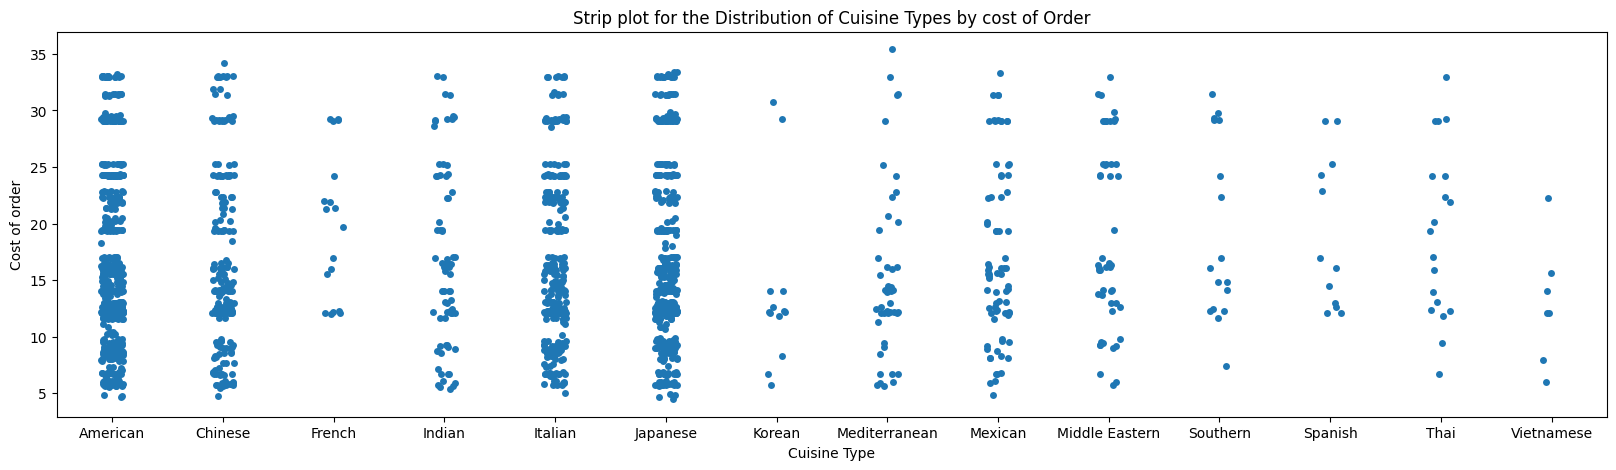

In [72]:
#To explore the relationship between the cost of order and cuisin type using the strip plot
plt.figure(figsize = (20, 5))
sns.stripplot(data=df_1, x='cuisine_type', y='cost_of_the_order')
plt.ylabel ('Cost of order')
plt.xlabel  ('Cuisine Type')
plt.title  ('Strip plot for the Distribution of Cuisine Types by cost of Order')


##### Observation
* The demand for all cuisines reduces with increasing cost however with less impact on the American and Japanese
* There was still a high demand for the 4 popular Cuisines (American, Japanese, Italian and Chinese) with increasing cost of order specifically for Japanese and American cuisines where a good proportion still bought at the very high cost of 25 dollars
* Vietnamese generally have low demand but are also mostly affected by the cost. No demand for it at a higher cost.
* It seems few customers have very high taste for Mediterranean cuisine as it was demanded even with very high cost

In [42]:
pd.pivot_table(df, index=['day_of_the_week'], values='delivery_time', aggfunc='mean')

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observation

* The mean delivery time for weekend is higher than weekdays i.e on the average, meals take more time to be delivered on weekends as compared to week days


### Multivariable analysis

* To  further draw insight, I explored the relationship between the three numerical variables.


In [43]:
corr = df[num_cols].corr()
corr

,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


<Axes: >

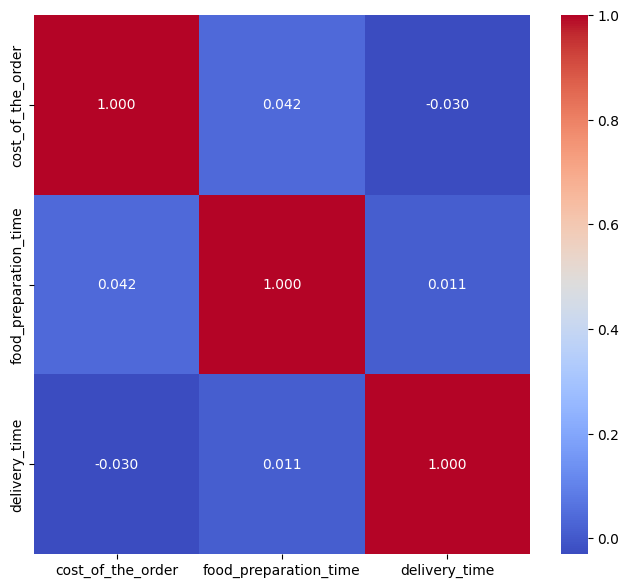

In [44]:
# Plot the heatmap
# To increase the plot size
plt.figure(figsize = (8, 7))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".3f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

##### Observation
* Food preparation time is slightly positively correlated with the cost of order suggesting that expensive Cuisines take longer time to prepare.
* On the contrary, the cost of the order is slightly negatively correlated with delivery time.

### Conclusions:
* The mean delivery time was higher on weekends than on weekdays
* There are 178 Restaurants included in the analysis
* The average food preparation time for all cuisines was 27.4 mins while the average total delivery time (food preparation and delivery time) is ~51 minutes.
* Cuisines with a high cost of order require more total delivery time.
* The 4 most demanded cuisines were American, Japanese, Italian and Chinese while the least demanded cuisines were Southern, French, Spanish and Vietnamese respectively.
* Consumers were most likely not to rate the order at all or rate it 5 i.e high on the extremes meaning they are either satisfied or not.

### Recommendations:
* Restaurants should deploy more resources on weekends than weekdays to optimise profit on weekends and maximise cost on weekdays.
* For more profit, restaurants should prioritise the production of highly demanded cuisines (American, Japanese, Italian and Chinese).
* Restaurants should also do a survey to identify consumers' disatisfaction/target populations for the less demanded cuisines (Southern, French, Spanish and Vietnamese).
* The Korean and Spanish cuisines should only be prepared on weekends as there is less demand for them during weekdays.
* Cuisines not rated at all should be given priority for improvement.
* Other restaurants should learn from Shake Shack Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm respectively as these are leading with the number of orders placed.